In [ ]:
#Binary classification
#Multiclass classification
#Regression

In [1]:
#Assignment:
#Adagrad
#ADAM
#SGD
#RMSProp
#Find the difference between these optimizers

In [2]:
#Binary classification -> Binary crossentropy
#Multiclass classification -> Categorical crossentropy
#Regression-> MSE

### 1. Example 1 - IMDB Movie database (Binary classification)

In [3]:
from keras.datasets import imdb
#train, test = imdb.load_data(num_words=10000)
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) #unpacking

D:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [4]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [6]:
train_labels[0]

1

In [8]:
max([max(sequence) for sequence in train_data])

9999

In [9]:
imdb.get_word_index()

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [10]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [11]:
decoded_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])

In [13]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

1. The brown fox
2. Hello fox
3. Brown pencil

The=1
brown = 2
fox=3
Hello=4
Pencil=5

Bag of words

1    2     3    4     5
[1   1      1    0     0]   The brown fox
[0   0      1    1      0] Hello fox
[0   1      0     0     1] Brown pencil

### Preprocessing: cleaning/ transformation

In [15]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) #25000 X 10000
    #sequences (0 - 25000)
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  #[0, [180,19999,89000]] = 1
    return results

In [16]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [32]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [19]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [24]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [26]:
reverse_word_index.get(2)

'and'

In [28]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #binary classification so, activation function = sigmoid

In [29]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [33]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [34]:
#train, validation, test

In [36]:
#Validation - Hyperparameters' selection - # of layers, #of neurons, #lr

In [37]:
history = model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 8s 167ms/step - loss: 0.5034 - accuracy: 0.7935 - val_loss: 0.3802 - val_accuracy: 0.8708
Epoch 2/20
30/30 [==============================] - 1s 40ms/step - loss: 0.3006 - accuracy: 0.9030 - val_loss: 0.3250 - val_accuracy: 0.8708
Epoch 3/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2216 - accuracy: 0.9273 - val_loss: 0.2918 - val_accuracy: 0.8860
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1772 - accuracy: 0.9399 - val_loss: 0.2836 - val_accuracy: 0.8867
Epoch 5/20
30/30 [==============================] - 1s 48ms/step - loss: 0.1436 - accuracy: 0.9551 - val_loss: 0.2900 - val_accuracy: 0.8843
Epoch 6/20
30/30 [==============================] - 2s 51ms/step - loss: 0.1187 - accuracy: 0.9624 - val_loss: 0.3074 - val_accuracy: 0.8808
Epoch 7/20
30/30 [==============================] - 1s 50ms/step - loss: 0.0977 - accuracy: 0.9700 - val_loss: 0.3138 - val_accuracy: 0.8801
Epoch 8/20
3

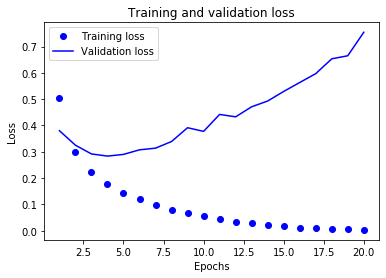

In [39]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

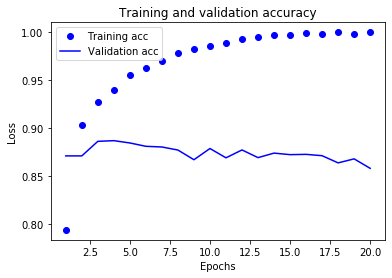

In [44]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [45]:
#Now let's do final training

In [46]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs=4, batch_size=512)



results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 5s 33ms/step - loss: 0.4587 - accuracy: 0.8284
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2663 - accuracy: 0.9084
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2045 - accuracy: 0.9283
Epoch 4/4
782/782 [==============================] - 9s 4ms/step - loss: 0.3105 - accuracy: 0.8762


In [47]:
results

[0.3105093240737915, 0.8761600255966187]

In [49]:
x_test[0].shape

(10000,)

In [51]:
model.predict(x_test[0].reshape(1,10000))

array([[0.16654667]], dtype=float32)

In [52]:
' '.join([reverse_word_index.get(i-3, '?') for i in test_data[0]])

"? please give this one a miss br br ? ? and the rest of the cast rendered terrible performances the show is flat flat flat br br i don't know how michael madison could have allowed this one on his plate he almost seemed to know this wasn't going to work out and his performance was quite ? so all you madison fans give this a miss"

### Example 2 : Reuters data set (Multiclass classification)

In [53]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [54]:
train_data.shape

(8982,)

In [64]:
test_data.shape

(2246,)

In [56]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [57]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

One hot encoding
y = sports, enter, health, weather ... 46 topics

sports, enter, health, weather 

[1 0 0 0]
[0 1 0 0]
[0 0 1 0]
[0 0 0 1]

In [58]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [60]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax')) #For multiclass classification activation = softmax

In [61]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [62]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [63]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 89ms/step - loss: 2.6218 - accuracy: 0.5000 - val_loss: 1.7485 - val_accuracy: 0.6550
Epoch 2/20
16/16 [==============================] - 1s 75ms/step - loss: 1.4308 - accuracy: 0.7071 - val_loss: 1.2984 - val_accuracy: 0.7120
Epoch 3/20
16/16 [==============================] - 1s 78ms/step - loss: 1.0469 - accuracy: 0.7762 - val_loss: 1.1189 - val_accuracy: 0.7640
Epoch 4/20
16/16 [==============================] - 1s 76ms/step - loss: 0.8258 - accuracy: 0.8215 - val_loss: 1.0072 - val_accuracy: 0.7850
Epoch 5/20
16/16 [==============================] - 1s 76ms/step - loss: 0.6578 - accuracy: 0.8629 - val_loss: 0.9442 - val_accuracy: 0.8020
Epoch 6/20
16/16 [==============================] - 1s 76ms/step - loss: 0.5288 - accuracy: 0.8844 - val_loss: 0.9420 - val_accuracy: 0.7960
Epoch 7/20
16/16 [==============================] - 1s 83ms/step - loss: 0.4248 - accuracy: 0.9126 - val_loss: 0.8851 - val_accuracy: 0.8120
Epoch 8/20
16

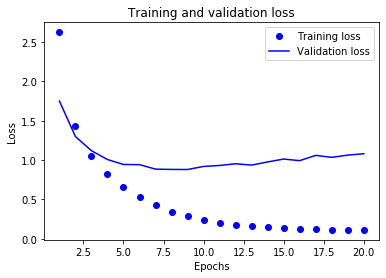

In [65]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

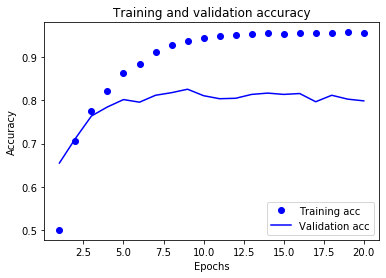

In [70]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [74]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 2s 94ms/step - loss: 2.5604 - accuracy: 0.5215 - val_loss: 1.6689 - val_accuracy: 0.6530
Epoch 2/9
16/16 [==============================] - 1s 76ms/step - loss: 1.3706 - accuracy: 0.7170 - val_loss: 1.2796 - val_accuracy: 0.7230
Epoch 3/9
16/16 [==============================] - 1s 76ms/step - loss: 1.0189 - accuracy: 0.7808 - val_loss: 1.1124 - val_accuracy: 0.7580
Epoch 4/9
16/16 [==============================] - 1s 79ms/step - loss: 0.8119 - accuracy: 0.8272 - val_loss: 1.0226 - val_accuracy: 0.7820
Epoch 5/9
16/16 [==============================] - 1s 89ms/step - loss: 0.6488 - accuracy: 0.8612 - val_loss: 0.9490 - val_accuracy: 0.8080
Epoch 6/9
16/16 [==============================] - 1s 89ms/step - loss: 0.5179 - accuracy: 0.8923 - val_loss: 0.9155 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 85ms/step - loss: 0.4163 - accuracy: 0.9119 - val_loss: 0.8879 - val_accuracy: 0.8180
Epoch 8/9
16/16 [===

In [75]:
results

[1.0323518514633179, 0.784060537815094]

In [72]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=3,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/3
16/16 [==============================] - 2s 90ms/step - loss: 2.5916 - accuracy: 0.5475 - val_loss: 1.7114 - val_accuracy: 0.6640
Epoch 2/3
16/16 [==============================] - 1s 77ms/step - loss: 1.3814 - accuracy: 0.7191 - val_loss: 1.2755 - val_accuracy: 0.7150
Epoch 3/3
71/71 [==============================] - 0s 5ms/step - loss: 1.1830 - accuracy: 0.7382


In [73]:
results

[1.183011531829834, 0.7382012605667114]

In [76]:
#Using sparse categorical cross entropy

In [77]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [80]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='sparse_categorical_crossentropy',
metrics=['acc'])
model.fit(x_train,
y_train,
epochs=3,
batch_size=512)

Epoch 1/3
18/18 [==============================] - 2s 78ms/step - loss: 2.5808 - acc: 0.4941
Epoch 2/3
18/18 [==============================] - 1s 73ms/step - loss: 1.3639 - acc: 0.7054
Epoch 3/3
18/18 [==============================] - 1s 72ms/step - loss: 0.9859 - acc: 0.7909


In [81]:
#summarizing
#Multiclass classification
#One hot encoding -> Categorical cross entropy
#Normal categories -> Sparse categorical cross entropy

In [84]:
#Experimenting with networks of different sizes

In [82]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 5s 34ms/step - loss: 3.1318 - accuracy: 0.1329 - val_loss: 2.4940 - val_accuracy: 0.4090
Epoch 2/20
63/63 [==============================] - 2s 33ms/step - loss: 1.9905 - accuracy: 0.5058 - val_loss: 1.7523 - val_accuracy: 0.6070
Epoch 3/20
63/63 [==============================] - 2s 32ms/step - loss: 1.4818 - accuracy: 0.6352 - val_loss: 1.5280 - val_accuracy: 0.6400
Epoch 4/20
63/63 [==============================] - 2s 26ms/step - loss: 1.3042 - accuracy: 0.6714 - val_loss: 1.4809 - val_accuracy: 0.6560
Epoch 5/20
63/63 [==============================] - 1s 23ms/step - loss: 1.2028 - accuracy: 0.6996 - val_loss: 1.4512 - val_accuracy: 0.6610
Epoch 6/20
63/63 [==============================] - 1s 22ms/step - loss: 1.1270 - accuracy: 0.7134 - val_loss: 1.4499 - val_accuracy: 0.6580
Epoch 7/20
63/63 [==============================] - 2s 26ms/step - loss: 1.0642 - accuracy: 0.7223 - val_loss: 1.4512 - val_accuracy: 0.6660
Epoch 8/20
63

In [88]:
import keras
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=[keras.metrics.Precision(top_k=2)])
model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=128,
validation_data=(x_val, y_val))

Epoch 1/20
63/63 [==============================] - 4s 35ms/step - loss: 1.7332 - precision: 0.3575 - val_loss: 1.1608 - val_precision: 0.4040
Epoch 2/20
63/63 [==============================] - 2s 32ms/step - loss: 0.9097 - precision: 0.4291 - val_loss: 0.9908 - val_precision: 0.4295: 0s - loss: 0.9336 - precision: 
Epoch 3/20
63/63 [==============================] - 2s 35ms/step - loss: 0.5965 - precision: 0.4630 - val_loss: 0.8667 - val_precision: 0.4450
Epoch 4/20
63/63 [==============================] - 2s 33ms/step - loss: 0.4015 - precision: 0.4810 - val_loss: 0.8740 - val_precision: 0.4485
Epoch 5/20
63/63 [==============================] - 2s 33ms/step - loss: 0.2919 - precision: 0.4890 - val_loss: 0.8495 - val_precision: 0.4530
Epoch 6/20
63/63 [==============================] - 2s 32ms/step - loss: 0.2269 - precision: 0.4922 - val_loss: 0.8775 - val_precision: 0.4505
Epoch 7/20
63/63 [==============================] - 2s 31ms/step - loss: 0.1946 - precision: 0.4944 - val_los

### Example 3: Boton Housing dataset (Regression)

In [89]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [90]:
train_data.shape

(404, 13)

In [91]:
train_targets[0:11]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1])

In [93]:
#Normalizing
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [94]:
train_data[:11]

array([[-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
        -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
         1.14850044,  0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, -0.25683275, -1.21518188,
         1.89434613, -1.91036058,  1.24758524, -0.85646254, -0.34843254,
        -1.71818909,  0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , -0.25683275,  0.62864202,
        -1.82968811,  1.11048828, -1.18743907,  1.67588577,  1.5652875 ,
         0.78447637,  0.22061726, -1.30850006],
       [-0.40149354, -0.48361547, -0.86940196, -0.25683275, -0.3615597 ,
        -0.3245576 , -1.23667187,  1.10717989, -0.51114231, -1.094663  ,
         0.78447637,  0.44807713, -0.65292624],
       [-0.0056343 , -0.48361547,  1.0283258 , -0.25683275,  1.32861221,
         0.15364225,  0.69480801, -0.57857203,  1.67588577,  1.5652875 ,
         0.78447637,  0.3898823 ,  0.26349695],
       [-0.37502238, -0.483615

In [96]:
from keras import models
from keras import layers
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1)) #Since it is regression problem, last layer has no activation fuction
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [97]:
model = build_model()

In [100]:
history = model.fit(train_data,train_targets,epochs=20,batch_size=100)

Epoch 1/20
5/5 [==============================] - 0s 3ms/step - loss: 13.9644 - mae: 2.6193
Epoch 2/20
5/5 [==============================] - 0s 4ms/step - loss: 13.6853 - mae: 2.6580
Epoch 3/20
5/5 [==============================] - 0s 5ms/step - loss: 13.6064 - mae: 2.5670
Epoch 4/20
5/5 [==============================] - 0s 6ms/step - loss: 13.6541 - mae: 2.7051
Epoch 5/20
5/5 [==============================] - 0s 5ms/step - loss: 13.6728 - mae: 2.7359
Epoch 6/20
5/5 [==============================] - 0s 3ms/step - loss: 13.4927 - mae: 2.7017
Epoch 7/20
5/5 [==============================] - 0s 4ms/step - loss: 12.8491 - mae: 2.6110
Epoch 8/20
5/5 [==============================] - 0s 6ms/step - loss: 12.6761 - mae: 2.5940
Epoch 9/20
5/5 [==============================] - 0s 4ms/step - loss: 12.4215 - mae: 2.4688
Epoch 10/20
5/5 [==============================] - 0s 6ms/step - loss: 12.4450 - mae: 2.4857
Epoch 11/20
5/5 [==============================] - 0s 6ms/step - loss: 12.2697 

In [99]:
#k-fold cross validation

In [101]:
import numpy as np
k=4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

In [102]:
for i in range(k):
    print('processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    
    partial_train_data = np.concatenate([train_data[:i * num_val_samples],
                                         train_data[(i + 1) * num_val_samples:]],
                                        axis=0)
    
    partial_train_targets = np.concatenate([train_targets[:i * num_val_samples],
                                            train_targets[(i + 1) * num_val_samples:]],
                                           axis=0)

    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [103]:
all_scores

[2.1193253993988037, 2.730466365814209, 2.261746406555176, 2.6372947692871094]

In [105]:
sum(all_scores)/4

2.4372082352638245